# Data preparation

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

   1.  Variable Identification
   2.  Missing values treatment
   3.  Outlier treatment
   4.  Encoding
   5.  A little Viz
   
Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Minmax scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house=pd.read_csv("train.csv")

# Variable Identification 

Identify Predictor (Input) and Target (output) variables 

For example for the given dataset, problem statements could be, 

1. Given the information of the patient what is 

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 Seperate them into Datatypes of catogarical and Continuouse ones 

In [5]:
a = house.dtypes[house.dtypes == 'object'].index
house[a].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Handling Missing Values
We treat missing values in a variety of ways, 

    1. Deletion
    2. Mean/Mode/Median imputation
    3. Prediction Model: In this we train a model that is let to overfit to predict the missing values. 
    
What we use is subjective and depends on the use case. 

In [6]:
house.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [7]:
house.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [8]:
house.Alley.isna().sum()

1369

In [9]:
house.drop('Alley',inplace=True, axis=1)

In [10]:
a = house.dtypes[house.dtypes == 'object'].index
house[a].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
house[a].isna().sum()

MSZoning            0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [12]:
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [13]:
b = house.dtypes[house.dtypes == 'float64'].index
house[b].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
house.MasVnrArea.fillna(0,inplace=True)

In [15]:
house.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [16]:
c = house.dtypes[house.dtypes == 'int64'].index
house[c].isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [17]:
house[a].columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
house[['MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']]

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,Gd,TA,No,Unf,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,Stone,Gd,TA,No,ALQ,Rec,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,None,TA,Gd,No,GLQ,Unf,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,None,TA,TA,Mn,GLQ,Rec,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


As you can see PoolQC,Fence,MiscFeatures for example have many nan values but they definitely add a lot of value in determining the house prices and hence removing the column doesn't make sense. It can safely be said that the NaN values here maybe a No. So we will use a fillna('No')

Check out ffill and bfill methods in fillna. They are usually used in timeseries/order sensitive data where missing values could be easily identified and replaced based on trends.

In [19]:
house.fillna({'MasVnrType':'No', 'BsmtQual':'No', 'BsmtCond':'No','BsmtExposure':'No','BsmtFinType1':'No','BsmtFinType2':'No', 'FireplaceQu':'No','GarageType':'No','GarageFinish':'No','GarageQual':'No','GarageCond':'No','PoolQC':'No','Fence':'No','MiscFeature':'No'}, inplace=True)
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,4,2010,WD,Normal,142125


In [20]:
house.Electrical.value_counts()
#Replace with mode
house['Electrical'].fillna("SBrkr",inplace=True)

For example, LotFrontage has a lot of null values, around 259 of em. The way we go about filling these values can go in various directions. Let's see. The null values might be because they are essentially not attached to any street inherently, so it might make sense to replace them with 0. But, 

In [24]:
house[house.LotFrontage.isnull()].LotConfig.value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [25]:
house.LotFrontage.mean()

70.04995836802665

This means that that might not be the case. So we need to fill in some sensible value here. One direction of thinking might be that houses in a specific neighborhood will have similar LofFrontage due to their arrangement, so we substitute the nulls values with the mean of LotFrontage of various neighbourhoods. 

In [26]:
house[['Neighborhood', 'LotFrontage']].groupby(['Neighborhood']).mean()

,LotFrontage
Neighborhood,
Blmngtn,47.142857
Blueste,24.000000
BrDale,21.562500
BrkSide,57.509804
ClearCr,83.461538
CollgCr,71.682540
Crawfor,71.804878
Edwards,68.217391
Gilbert,79.877551


In [22]:
house[['Neighborhood', 'LotFrontage']].groupby(['Neighborhood']).transform(lambda x: x.fillna(x.mean()))

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
...,...
1455,62.0
1456,85.0
1457,66.0
1458,68.0


In [27]:
house[['Neighborhood', 'LotFrontage', 'LotConfig']].groupby(['Neighborhood', 'LotConfig']).mean()

LotFrontage
Neighborhood LotConfig             
Blmngtn      Inside       47.142857
Blueste      Inside       24.000000
BrDale       Inside       21.562500
BrkSide      Corner       52.555556
             FR2          60.000000
...                             ...
Timber       Inside       79.954545
Veenker      Corner       90.000000
             CulDSac      31.000000
             FR2          80.000000
             Inside       53.000000

[78 rows x 1 columns]

In [28]:
house[['Neighborhood', 'LotFrontage', 'LotConfig']].groupby(['Neighborhood', 'LotConfig']).transform(lambda x: x.fillna(x.mean()))

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
...,...
1455,62.0
1456,85.0
1457,66.0
1458,68.0


What is better? Well, the latter seems more accurate but you'll know if your approach makes sense once you train and see the results. 

# Skew Removal

(array([ 76.,  98., 210., 431., 324., 161.,  66.,  33.,  10.,  14.,   5.,
          7.,   2.,   1.,   3.,   2.,   2.,   1.,   1.,   0.,   1.,   1.,
          1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1300.  ,   3439.45,   5578.9 ,   7718.35,   9857.8 ,  11997.25,
         14136.7 ,  16276.15,  18415.6 ,  20555.05,  22694.5 ,  24833.95,
         26973.4 ,  29112.85,  31252.3 ,  33391.75,  35531.2 ,  37670.65,
         39810.1 ,  41949.55,  44089.  ,  46228.45,  48367.9 ,  50507.35,
         52646.8 ,  54

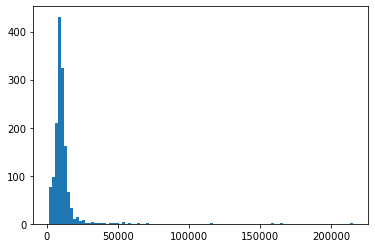

In [29]:
plt.hist(house.LotArea, bins = 100)

(array([  1.,   0.,   2.,   3.,   1.,  10.,   0.,   7.,   3.,   4.,   5.,
          4.,   5.,   7.,   2.,   1.,   4.,  14.,   3.,   3.,   8.,   8.,
          9.,  14.,  16.,   4.,  15.,  17.,  13.,  27.,  30.,  14.,  26.,
         62.,  51.,  69.,  84., 103.,  92., 109.,  90.,  88.,  78.,  71.,
         48.,  43.,  44.,  26.,  20.,  20.,  14.,   8.,   5.,   3.,   8.,
          7.,   3.,   4.,   5.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,
          1.,   1.,   0.,   1.,   1.,   1.,   3.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 7.17011954,  7.22121367,  7.2723078 ,  7.32340192,  7.37449605,
         7.42559018,  7.4766843 ,  7.52777843,  7.57887256,  7.62996668,
         7.68106081,  7.73215493,  7.78324906,  7.83434319,  7.88543731,
         7.93653144,  7.98762557,  8.03871969,  8.08981382,  8.14090795,
         8.19200207,  8.24

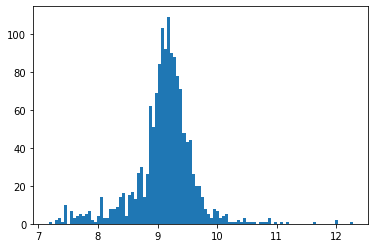

In [30]:
plt.hist(np.log(house.LotArea), bins = 100)


Kurtosis is a measure of tailed-ness or spread of the distribution. mathematically it is calculated using the expectation of the 4 degree of variation from the mean, which would be E((X - E[X])^4), divided by the 4th power of standard deviation.

In [31]:
house.LotArea.kurtosis()

203.24327101886033

This tailed-ness needs to be removed, as the tailed-ness is due to outliers. We can use the box plot concept to identify the outliers, and then replace them with mean/median, or use winsorisation (use the extremum values)

In [32]:
def remove_outliers(x):
    q1 = house.LotArea.quantile(q = 0.25)
    q3 = house.LotArea.quantile(q = 0.75)
    iqr = q3 - q1
    outlier_range = 1.5*iqr
    r_whisker = q3 + outlier_range
    l_whisker = q1 - outlier_range
    if (x > r_whisker):
        return q3
    elif (x < l_whisker):
        return q1
    else: 
        return x
    
house.LotArea.apply(lambda x: remove_outliers(x)).kurtosis()

0.0990595579172977

This has decreased the kurtosis a lot, but we are loosing a lot of original values. So it might be best to test both cases. 

# Categorical Values

Sometimes, the numbers might not make sense as numbers. Sometimes the columns won't have numbers at all. We need to handle them well as your model can only understand numbers.

Categories mainly come as two types, ordinal and non-ordinal. Ordinal values simply have a inherent order in the categories, like "low, medium, high", years and months. Non-ordinal would be values which have no inherent order in them like countries. 

Some values might might make more sense as binned categories than their intrinsic numerical values. For example time. Years and months are represented as numbers but they aren't numbers, so it makes more sense to label encode them. 

In [33]:
house.YrSold = house.YrSold.astype(str)
house.MoSold = house.MoSold.astype(str)

Some numerical values are very discreet, and it makes more sense to bin them into respective categories, like MSSubClass which is the class of the building and the value here is some type of a code than a number. 

In [35]:
house.MSSubClass.value_counts()
house.MSSubClass = house.MSSubClass.astype(str)

In [38]:
house.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

### In order to treat them as categories, we need to either label encode them or one-hot encode them. 

Label-encoding simply gives them values like 0,1,2.... whereas one-hot encoding takes each category as a column and throw a value 1 for positive hit and 0 for a negative hit. There is an issue with label-encoding, as you are giving orderly values to categorical data which might not even be ordered, effectively changing the data and the model's understanding of the data. In such case we use the one-hot encoding method, but even this has an issue of multi-collinearity, meaning correlation between various columns. How? Well, if you find a 1 in one of the columns, it would mean that the other columns will definitely be 0. 

In [36]:
#label encoding
lencoder = LabelEncoder() 
lencoder.fit_transform(house.MSSubClass) 

array([ 9,  4,  9, ..., 10,  4,  4])

This doesn't make sense as the column isn't actually ordered. So we'll use one-hot encoding. 

In [39]:
dumm = pd.get_dummies(house.MSSubClass)
# pd.concat([house, dumm], axis = 1)
# house.drop(columns=[['MSSubClass']])

In [40]:
dumm

,120,160,180,190,20,30,40,45,50,60,70,75,80,85,90
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1458,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now how do you ensure multicollinearity isn't a problem? We have a statistical measure that we can check. It's called variance inflation factor (VIF). Due to time constraint, we recommend you read [this](https://online.stat.psu.edu/stat462/node/180/) for VIF. Put your queries on slack if you have any doubts.   

In [41]:
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

vifcalc = pd.get_dummies(house.MSSubClass)
calculate_vif(vifcalc)

,Var,Vif
0,120,1.00
1,160,1.00
2,180,1.00
3,190,1.00
5,30,1.00
6,40,1.00
7,45,1.00
8,50,1.00
10,70,1.00
11,75,1.00


What do we do now? we drop the dummy columns which have very high VIF (above 5). After that, recalculate the VIF for all columns and you'll see a drop. 

What do we use? There are some heuristics you can follow, 
1. Use one-hot encoding if the number of categories are low, so you don't end up overloading your data and increasing memory required for training, else use label encoding. 
2. Use label encoding if the data is inherently ordered (ordinal categories). 

# visualising Categorical values

1. A simple bar plot will give you a really good picture of what's happening. If you want to visualise on a condition, like a groupby, you can use grouped bar plots.

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

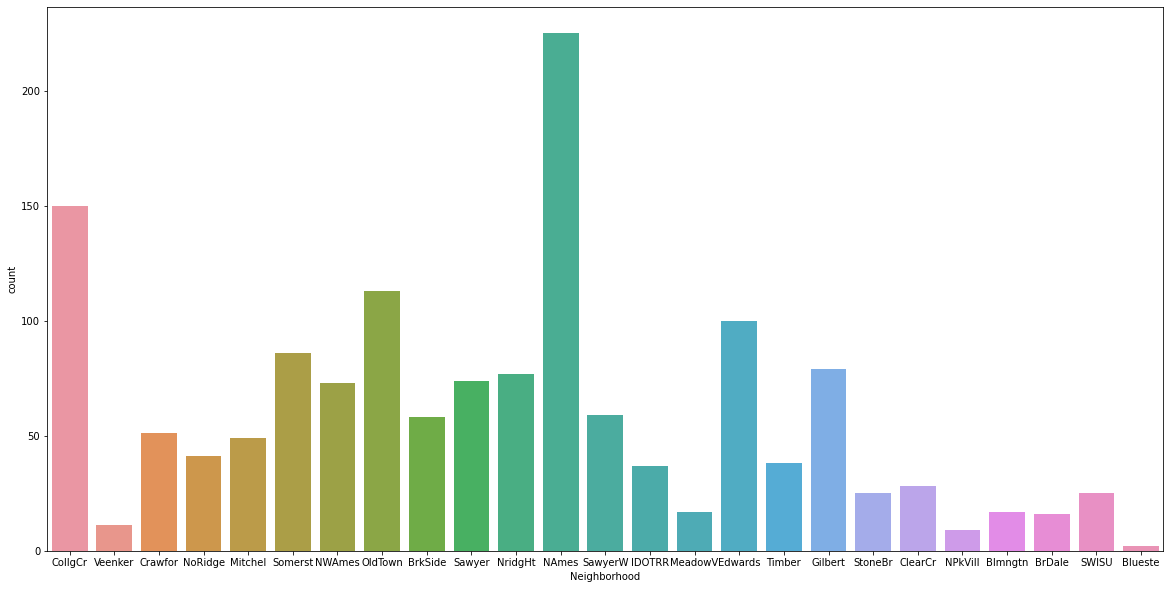

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(house.Neighborhood)

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

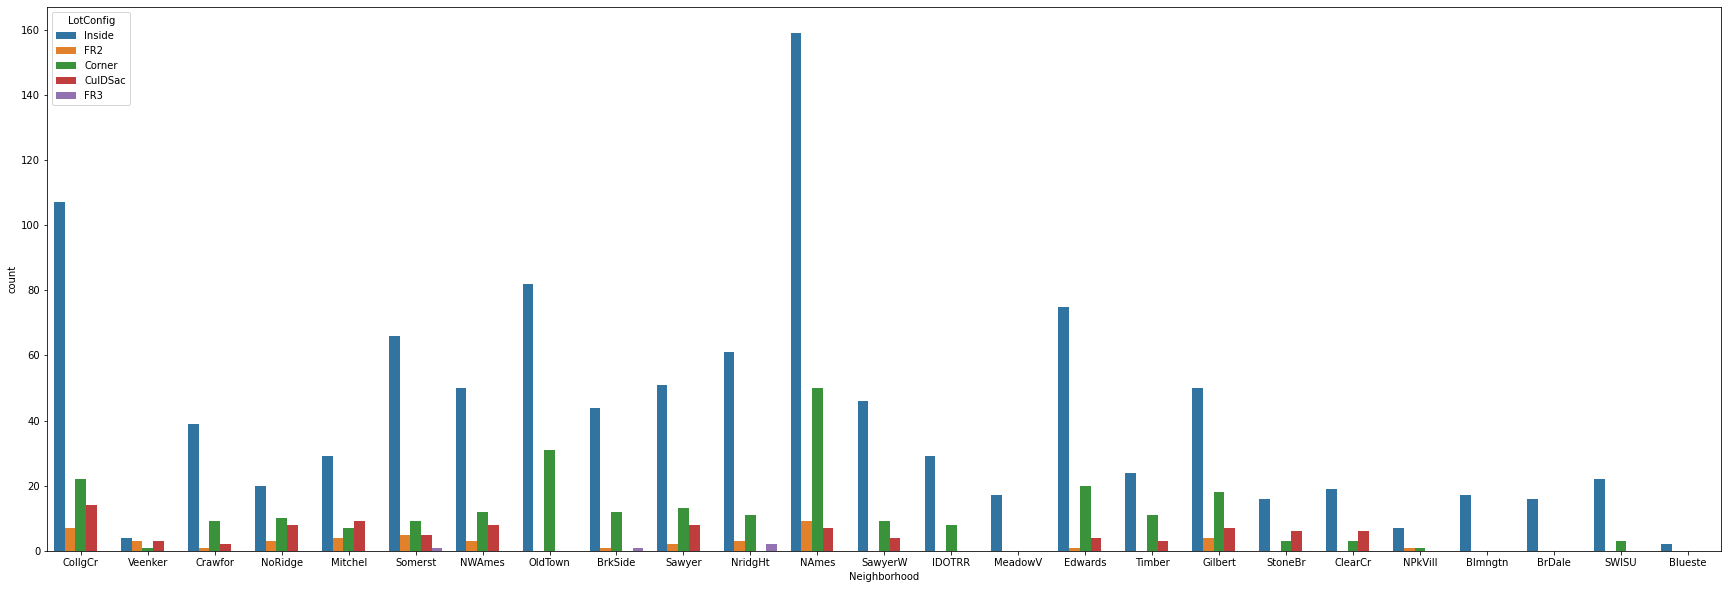

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(data=house, x= 'Neighborhood', hue = 'LotConfig')